In [2]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import seaborn as sns
import os
print(os.getcwd())

C:\Users\xzhao


In [3]:
titanic = pd.read_csv('C:\\Users\\xzhao\\OneDrive\\Desktop\\Python_EDA\\Data\\train.csv')
house = pd.read_csv('C:\\Users\\xzhao\\OneDrive\\Desktop\\Python_EDA\\Data\\fwddata\\housing.csv')
shuttle = pd.read_csv('C:\\Users\\xzhao\\OneDrive\\Desktop\\Python_EDA\\Data\\fwddata\\shuttle.csv')

In [9]:
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
house.shape

(20640, 9)

In [28]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [146]:
house.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,clustera,clusterb
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,1.062452,2.373692,0.713178
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.287691,1.543571,0.619077
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.000000,0.000000,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,0.000000,1.000000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.000000,2.000000,1.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,1.000000,4.000000,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,4.000000,4.000000,2.000000


In [18]:
print(house['Latitude'].max())
print(house['Latitude'].min())
print(house['Longitude'].max())
print(house['Longitude'].min())

41.95
32.54
-114.31
-124.35


In [20]:
house[house['Latitude'].isna()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [22]:
house[house['Longitude'].isna()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [33]:
house['Latitude'].astype(str).str.len()

0        5
1        5
2        5
3        5
4        5
        ..
20635    5
20636    5
20637    5
20638    5
20639    5
Name: Latitude, Length: 20640, dtype: int64

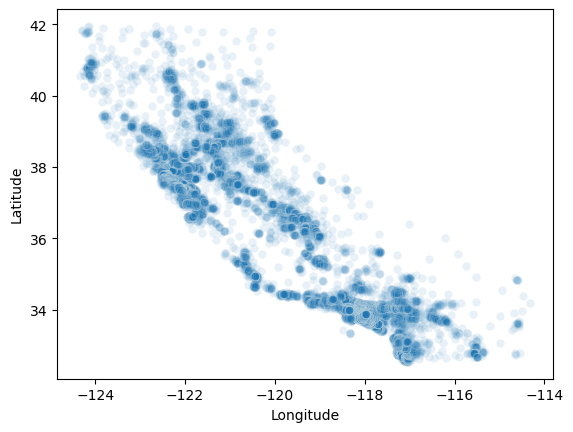

In [50]:
sns.scatterplot(data = house, y='Latitude', x='Longitude',alpha = 0.1)
plt.show()

In [53]:
loc = house.loc[:,['Longitude','Latitude']]
loc

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


In [109]:
from sklearn.cluster import KMeans #import function

kmeansa = KMeans(n_clusters=5, random_state=0) #define a model
kmeansa.fit(loc) #train model also, remember to normalize the data before fitting to model. it so happens cordinates are natually normalized, skipping it did not mess it in this case
labelsa = kmeansa.predict(loc) #use trained model to predict(in k means context, find the centroid)
centroidsa = kmeansa.cluster_centers_

kmeansb = KMeans(n_clusters=3, random_state=0) #define a model
kmeansb.fit(loc) #train model
labelsb = kmeansb.predict(loc) #use trained model to predict(in k means context, find the centroid)
centroidsb = kmeansb.cluster_centers_

print(centroidsa)

print(centroidsb)

[[-116.93539284   33.05150628]
 [-121.8671712    37.83854225]
 [-119.6896937    35.98288145]
 [-122.2855336    39.91464427]
 [-118.11860815   34.01336963]]
[[-121.93029495   38.11365147]
 [-117.88499501   33.82447204]
 [-119.71065654   35.9966522 ]]


In [110]:
house['clustera'] = labelsa
house['clusterb'] = labelsb

In [116]:
clusters = pd.DataFrame(kmeans.cluster_centers_)
clusters.columns = ['Longitude','Latitude']
clusters

,Longitude,Latitude
0,-118.135403,34.018440
1,-121.876069,37.841386
2,-119.708193,36.092850
3,-122.283670,39.916083
4,-116.940294,33.058349


In [105]:
print(house['clustera'].unique())
print(house['clusterb'].unique())

[0 2 1]
[0 2 1]


In [60]:
color_list = {0:'red',1:'blue',2:'green',3:'black',4:'yellow',5:'purple',6:'hotpink'}

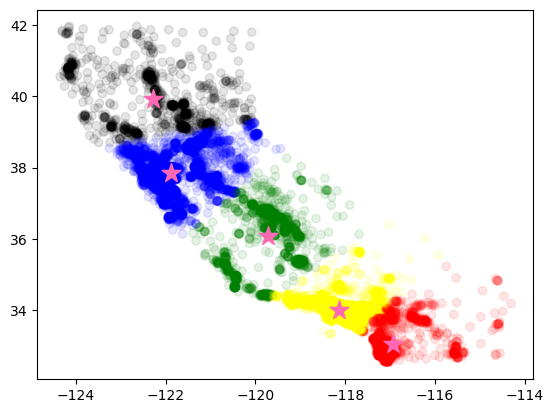

In [119]:
# fig, ax = plt.subplots(2) #define an empty plot

# ax[0].scatter(house['Longitude'], house['Latitude'], c=house['clustera'].map(color_list), alpha = 0.1)
# ax[1].scatter(house['Longitude'], house['Latitude'], c=house['clusterb'].map(color_list), alpha = 0.1)

fig, ax = plt.subplots() #define an empty plot

ax.scatter(house['Longitude'], house['Latitude'], c=house['clustera'].map(color_list), alpha = 0.1)
ax.scatter(clusters['Longitude'],clusters['Latitude'], marker='*', alpha=1, s=200,c='hotpink')
plt.show()

In [124]:
#inertia total distance from their corespoding centroid
print(kmeansa.inertia_)
print(kmeansb.inertia_)

10338.32615584236
18287.012026287335


In [142]:
K = range(2,20)
errors = [] # build a list for each different k number
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(loc) 
    errors.append(kmeans.inertia_)

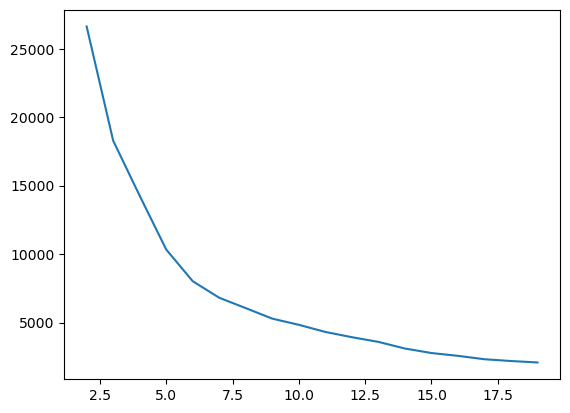

In [143]:
plt.plot(K,errors)
plt.show()

In [148]:
shuttle.head()

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,1
1,53,0,82,0,52,-5,29,30,2,0
2,37,0,76,0,28,18,40,48,8,0
3,37,0,79,0,34,-26,43,46,2,0
4,85,0,88,-4,6,1,3,83,80,1


In [151]:
shuttle.shape

(49097, 10)

PCA

In [154]:
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


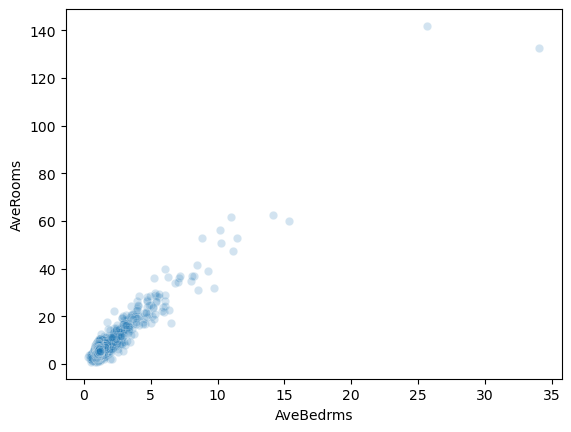

In [160]:
sns.scatterplot(data = house, y='AveRooms', x='AveBedrms',alpha = 0.2)
plt.show()

In [161]:
house.corr() # 2 approach, we notice Averoom and Avebedroom are highly correlated

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [182]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(house[['AveRooms','AveBedrms']])

PCA(n_components=1)

In [184]:
pca.explained_variance_ratio_

array([0.9902947])

In [165]:
house['room_pca'] = pca.transform(house[['AveRooms','AveBedrms']])

In [166]:
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,room_pca
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1.522832
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.778273
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.817683
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.379410
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.839086


In [181]:
pca = PCA(n_components=8)
pca.fit(house)
#pca = PCA(n_components=8)
house_pca8=pd.DataFrame(pca.transform(house))

In [ ]:
pca.explained_variance_ratio_

In [180]:
house_pca8.head()

,0,1,2,3,4,5,6,7
0,-1103.512939,8.522078,-0.763765,3.948789,-2.152396,-4.735920,-0.078429,-0.214798
1,975.541069,-4.692818,-1.030025,2.603395,-3.000893,-4.528426,-0.547921,0.128328
2,-929.550384,19.914877,-1.935867,6.119871,-1.995778,-2.914416,-0.546715,0.094165
3,-867.550131,20.314722,-2.294685,2.472524,-2.564607,-2.313765,0.019889,-0.065811
4,-860.550568,20.293431,-2.671720,2.709616,-2.687617,-0.658673,0.885899,-0.156606


In [190]:
K = range(1,8) 
#data variance and prediction power are two distince things
#PCA it down to 1 'feature' retains .999978 of data variance, but it's prediction power is lost, due to pca, not model failure
var = []
for i in K:
    pca = PCA(n_components=i)
    pca.fit(house)
    print(i,sum(pca.explained_variance_ratio_))

1 0.9997834170033749
2 0.9998968887195445
3 0.9999801765516354
4 0.9999900450980282
5 0.9999963687115321
6 0.9999993826488575
7 0.9999998275406596


# Anomaly Detection 

In [3]:
shuttle #9 is target, 0 is normal, 1 is anomly

,0,1,2,3,4,5,6,7,8,9
0,50,21,77,0,28,0,27,48,22,1
1,53,0,82,0,52,-5,29,30,2,0
2,37,0,76,0,28,18,40,48,8,0
3,37,0,79,0,34,-26,43,46,2,0
4,85,0,88,-4,6,1,3,83,80,1
...,...,...,...,...,...,...,...,...,...,...
49092,39,-2,80,-4,38,0,41,41,0,0
49093,43,0,81,1,42,-9,37,39,2,0
49094,49,0,87,0,46,-12,38,41,2,0
49095,80,0,84,0,-36,-29,4,120,116,1


In [4]:
shuttle_x = shuttle.drop(shuttle.columns[-1], axis=1)

In [5]:
shuttle_x

,0,1,2,3,4,5,6,7,8
0,50,21,77,0,28,0,27,48,22
1,53,0,82,0,52,-5,29,30,2
2,37,0,76,0,28,18,40,48,8
3,37,0,79,0,34,-26,43,46,2
4,85,0,88,-4,6,1,3,83,80
...,...,...,...,...,...,...,...,...,...
49092,39,-2,80,-4,38,0,41,41,0
49093,43,0,81,1,42,-9,37,39,2
49094,49,0,87,0,46,-12,38,41,2
49095,80,0,84,0,-36,-29,4,120,116


## Isolation forest

In [6]:
from sklearn.ensemble import IsolationForest
import numpy as np

In [7]:
clf = IsolationForest(random_state=0)
clf.fit(shuttle_x)

IsolationForest(random_state=0)

In [8]:
y_hat_f = pd.DataFrame(clf.predict(shuttle_x))
#y_hat.describe()
#in y_true 0 is normal, 1 is anomaly
#in y_hat  1 is normal, -1 is anomaly
y_hat_f

,0
0,1
1,1
2,1
3,1
4,-1
...,...
49092,1
49093,1
49094,1
49095,-1


In [294]:
y_hat_f[0] = y_hat_f[0].replace({1:0,-1:1})

In [295]:
y_hat_f

,0
0,0
1,0
2,0
3,0
4,1
...,...
49092,0
49093,0
49094,0
49095,1


In [296]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [297]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [298]:
report_f = classification_report(shuttle['9'], y_hat_f)
cm_f = confusion_matrix(shuttle['9'], y_hat_f)

In [299]:
print(report_f)
print(cm_f)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     45586
           1       0.68      0.99      0.81      3511

    accuracy                           0.97     49097
   macro avg       0.84      0.98      0.89     49097
weighted avg       0.98      0.97      0.97     49097

[[43968  1618]
 [   48  3463]]


##  Local outlier factor

In [300]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

In [301]:
db = LocalOutlierFactor(n_neighbors=20)
#db.fit_predict(shuttle_x)
y_hat_d = pd.DataFrame(db.fit_predict(shuttle_x))

In [302]:
#y_hat_d = pd.DataFrame(db.fit_predict(shuttle_x))
#y_hat_d = pd.DataFrame(db.predict(shuttle_x))
#y_hat.describe()
#in y_true 0 is normal, 1 is anomaly
#in y_hat  1 is normal, -1 is anomaly
#y_hat_f
y_hat_d[0] = y_hat_d[0].replace({1:0,-1:1})

In [303]:
y_hat_d.describe()

,0
count,49097.000000
mean,0.025358
std,0.157211
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [304]:
report_d = classification_report(shuttle['9'], y_hat_d)
cm_d = confusion_matrix(shuttle['9'], y_hat_d)

In [305]:
print(report_d)
print(cm_d)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     45586
           1       0.17      0.06      0.09      3511

    accuracy                           0.91     49097
   macro avg       0.55      0.52      0.52     49097
weighted avg       0.88      0.91      0.89     49097

[[44555  1031]
 [ 3297   214]]


## one class svm 

In [9]:
from sklearn.svm import OneClassSVM
import numpy as np

In [10]:
svm = OneClassSVM(kernel='rbf', nu=0.05)
svm.fit(shuttle_x)

OneClassSVM(nu=0.05)

In [11]:
y_hat_v = pd.DataFrame(svm.fit_predict(shuttle_x))

In [311]:
y_hat_v.describe()

,0
count,49097.000000
mean,0.899994
std,0.435907
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [312]:
y_hat_v[0] = y_hat_v[0].replace({1:0,-1:1})

In [313]:
report_v = classification_report(shuttle['9'], y_hat_v)
cm_v = confusion_matrix(shuttle['9'], y_hat_v)

In [314]:
print(report_v)
print(cm_v)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     45586
           1       0.60      0.42      0.49      3511

    accuracy                           0.94     49097
   macro avg       0.78      0.70      0.73     49097
weighted avg       0.93      0.94      0.93     49097

[[44593   993]
 [ 2049  1462]]


In [329]:
print(report_f)
print(report_d)
print(report_v)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     45586
           1       0.68      0.99      0.81      3511

    accuracy                           0.97     49097
   macro avg       0.84      0.98      0.89     49097
weighted avg       0.98      0.97      0.97     49097

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     45586
           1       0.17      0.06      0.09      3511

    accuracy                           0.91     49097
   macro avg       0.55      0.52      0.52     49097
weighted avg       0.88      0.91      0.89     49097

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     45586
           1       0.60      0.42      0.49      3511

    accuracy                           0.94     49097
   macro avg       0.78      0.70      0.73     49097
weighted avg       0.93      0.94      0.93     49097



## PCA and visualization 

In [315]:
from sklearn.preprocessing import StandardScaler

In [316]:
scaler = StandardScaler()

In [317]:
shuttle_xs = scaler.fit_transform(shuttle_x)

In [320]:
shuttle_xs = pd.DataFrame(shuttle_xs)

In [321]:
shuttle_xs

,0,1,2,3,4,5,6,7,8
0,0.238260,0.248766,-0.915031,-0.005674,-0.444413,-0.009894,-0.833005,-0.014028,0.494218
1,0.471269,0.000755,-0.351805,-0.005674,0.757816,-0.032796,-0.684264,-0.889010,-0.347859
2,-0.771447,0.000755,-1.027677,-0.005674,-0.444413,0.072553,0.133813,-0.014028,-0.095236
3,-0.771447,0.000755,-0.689741,-0.005674,-0.143856,-0.128983,0.356925,-0.111249,-0.347859
4,2.956700,0.000755,0.324066,-0.112117,-1.546457,-0.005313,-2.617900,1.687325,2.936243
...,...,...,...,...,...,...,...,...,...
49092,-0.616107,-0.022865,-0.577096,-0.112117,0.056516,-0.009894,0.208184,-0.354299,-0.432067
49093,-0.305428,0.000755,-0.464450,0.020937,0.256887,-0.051117,-0.089299,-0.451519,-0.347859
49094,0.160590,0.000755,0.211421,-0.005674,0.457259,-0.064858,-0.014928,-0.354299,-0.347859
49095,2.568352,0.000755,-0.126515,-0.005674,-3.650359,-0.142725,-2.543529,3.485899,4.451983


In [322]:
pca = PCA(n_components=2)
pca.fit(shuttle_xs)
pca_shuttle=pd.DataFrame(pca.transform(shuttle_xs))

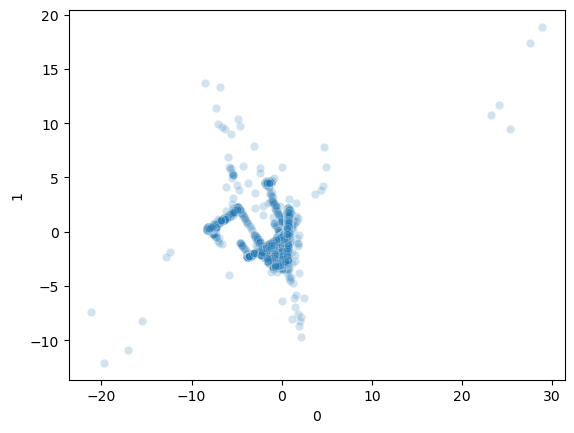

In [328]:
pca_shuttle
sns.scatterplot(data=pca_shuttle, x=0, y=1,alpha = 0.2)
plt.show()

## hand write gaussian distribution method 

In [599]:
data = pd.read_csv('C:\\Users\\xzhao\\OneDrive\\Desktop\\Python_EDA\\Data\\fwddata\\shuttle.csv')

In [600]:
data.corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.072188,0.278982,-0.008960,0.011395,0.000247,-0.774810,0.116359,0.538107,0.822831
1,0.072188,1.000000,-0.003416,-0.000039,-0.000361,-0.001144,-0.071079,-0.001083,0.039197,0.018608
2,0.278982,-0.003416,1.000000,0.046122,0.173417,0.001843,0.389770,0.261808,0.005554,0.159948
3,-0.008960,-0.000039,0.046122,1.000000,0.013857,0.073049,0.039383,0.006423,-0.016454,-0.009145
4,0.011395,-0.000361,0.173417,0.013857,1.000000,0.088903,0.100673,-0.904447,-0.835857,-0.431981
5,0.000247,-0.001144,0.001843,0.073049,0.088903,1.000000,0.000979,-0.085652,-0.074246,-0.001416
6,-0.774810,-0.071079,0.389770,0.039383,0.100673,0.000979,1.000000,0.063189,-0.510327,-0.683063
7,0.116359,-0.001083,0.261808,0.006423,-0.904447,-0.085652,0.063189,1.000000,0.825522,0.497420
8,0.538107,0.039197,0.005554,-0.016454,-0.835857,-0.074246,-0.510327,0.825522,1.000000,0.814244
9,0.822831,0.018608,0.159948,-0.009145,-0.431981,-0.001416,-0.683063,0.497420,0.814244,1.000000


In [647]:
# (data.corr().abs().sum()-1).sort_values(ascending=False) # this is not very useful due to the non-pairing of high corr

y    2.320138
a    2.135749
b    1.968200
c    1.862678
dtype: float64

In [605]:
# cc = 3

# (s[s<cc]).sort_values(ascending=False)


In [608]:
# i = s[s<cc].index.tolist()
# n = len(i)
# tar = '9'
# try:
#     i.remove(tar)
# except ValueError:
#     pass

# print(i,n)

#those extra feature actually hurts the anomaly detection 

In [606]:
data = data[['0','6','8','9']] 
# data = data.columns[i]
data.columns = ['a','b','c','y']

# data = shuttle.drop(shuttle.columns[-1], axis=1)

# data = data.rename(columns={data.columns[-1]: 'y'})
data

,a,b,c,y
0,50,27,22,1
1,53,29,2,0
2,37,40,8,0
3,37,43,2,0
4,85,3,80,1
...,...,...,...,...
49092,39,41,0,0
49093,43,37,2,0
49094,49,38,2,0
49095,80,4,116,1


In [609]:
train = data.iloc[:28000]
valid = data.iloc[28000:37000]
test = data.iloc[37000:]

In [610]:
train

,a,b,c,y
0,50,27,22,1
1,53,29,2,0
2,37,40,8,0
3,37,43,2,0
4,85,3,80,1
...,...,...,...,...
27995,45,36,0,0
27996,41,46,2,0
27997,37,39,0,0
27998,48,39,0,0


In [611]:
X = train[['a','b','c']]
# X = train.iloc[:,:5]

In [612]:
X.head()

,a,b,c
0,50,27,22
1,53,29,2
2,37,40,8
3,37,43,2
4,85,3,80


In [353]:
t= train[['c']]
t
a = np.prod( 1/(np.sqrt(2.0 * math.pi * sigma2)) * np.exp(-1.0 * (X-mu)**2 / (2.0 * sigma2) ), axis=1)
a.sum()
# this means neither a or t is the whole set of possible X values
# but swapping a, b, c returns the same value?

In [613]:
# set initial
mu = None
sigma2 = None
best_epsilon = None
best_f1_score = None

In [614]:
X = np.array(X)

In [615]:
X

array([[50, 27, 22],
       [53, 29,  2],
       [37, 40,  8],
       ...,
       [37, 39,  0],
       [48, 39,  0],
       [45, 33,  0]], dtype=int64)

In [616]:
# calculate mu and sigma2
def gau_para(X):
    mu = np.mean(X,axis=0)
    sigma2 = np.var(X,axis=0)
    return mu, sigma2

In [617]:
mu, sigma2 = gau_para(X)

In [618]:
import math

In [619]:
# fit gaussian formula
def fit_gau(X,mu,sigma2):
    p = np.prod( 1/(np.sqrt(2.0 * math.pi * sigma2)) * np.exp(-1.0 * (X-mu)**2 / (2.0 * sigma2) ), axis=1)
    return p

In [620]:
p = fit_gau(X,mu,sigma2)

In [621]:
p

array([9.30508212e-06, 1.01980896e-05, 1.12334751e-05, ...,
       1.03599800e-05, 1.38492646e-05, 1.27812113e-05])

In [622]:
min(p)

1.3171558250214935e-59

In [629]:
outp = np.argmin(p)

In [630]:
data.iloc[outp]

a     79
b      4
c   -356
y      1
Name: 2654, dtype: int64

In [594]:
max(p)

1.4369726763892543e-15

In [631]:
inp = np.argmax(p)

In [633]:
data.iloc[inp]

a    46
b    38
c     2
y     0
Name: 2041, dtype: int64

In [634]:
# find proper epsilon as outlier threshold
y = train['y'].tolist()

In [635]:
# find proper epsilon as outlier threshold
# define f1 score

# epsilon = min(p)
def f1(p,y,epsilon):
    y_hat = (p < epsilon).astype(int) #true = 1, false = 0
    tp, fp, fn, tn = 0,0,0,0

    for i in range (0,len(y)):
        if y_hat[i] == 1 and y[i] ==1 :
            tp = tp+1
        elif y_hat[i] == 1 and y[i] ==0 :
            fp = fp+1   
        elif y_hat[i] == 0 and y[i] ==1 :
            fn = fn+1        
        else:
            tn = tn+1

    if tp == 0 or (tp+fp)==0 or (tp+fn)==0:
        return 0, 0 , 0
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*precision*recall/(precision+recall)
    return f1, precision, recall

In [636]:
def find_best_epsilon(p,y):
    step = (max(p) - min(p))/200
    best_f1_score = 0
#     best_espilon = 0
    for epsilon in np.arange(min(p),max(p)+step,step):
        f1s, prec, rec = f1(p,y,epsilon)
        if f1s > best_f1_score:
            best_epsilon = epsilon
            best_f1_score = f1s
    return best_epsilon, best_f1_score

In [637]:
print(best_epsilon)

None


In [638]:
best_epsilon, best_f1_score = find_best_epsilon(p, y)

In [639]:
best_epsilon

3.586405420909157e-07

In [640]:
print('f1, prec, rec', f1(p,y,best_epsilon))  #so by including more feature, i get worse results

f1, prec, rec (0.9697123950114532, 0.9958180867746994, 0.9449404761904762)


In [643]:
X_valid = np.array(valid[['a','b','c']])
y_valid = valid['y'].tolist()
p_valid = fit_gau(X_valid,mu,sigma2) 
## this assumes that X_valid and X has same mu and sigma2, 
#accross 3 datasets, the only parameter carried away is mu and sigma2 from X_train

In [644]:
print('f1, prec, rec', f1(p_valid,y_valid,best_epsilon))

f1, prec, rec (0.9762282091917592, 1.0, 0.9535603715170279)


In [645]:
X_test = np.array(test[['a','b','c']])
y_test = test['y'].tolist()
p_test = fit_gau(X_test,mu,sigma2) 

In [646]:
print('f1, prec, rec', f1(p_test,y_test,best_epsilon))

f1, prec, rec (0.9740494870247435, 0.9987623762376238, 0.950530035335689)


In [ ]:
#what should i do if including more features lowers metrics, meaning the data is fuzzy or i need better feature selection criteria